In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/archive/archive.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/archive')

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate
from tensorflow.keras.models import Sequential


from distutils.dir_util import copy_tree, remove_tree

#   SMOTETomek from imblance library
from imblearn.combine import SMOTETomek

import os
print(os.listdir("/content/drive/MyDrive/archive/archive/dataset"))

print("TensorFlow Version:", tf.__version__)

['cercospora', 'health', 'miner', 'phoma', 'rust']
TensorFlow Version: 2.12.0


In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [ ]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory("/content/drive/MyDrive/archive/archive/dataset", target_size=(128, 128),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 2203 images belonging to 5 classes.


In [ ]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (2203, 128, 128, 3)
Labels shape :	 (2203, 5)


In [ ]:
#   Number of samples in classes
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 318), (1, 261), (2, 539), (3, 464), (4, 621)]
Classes Names according to index:	 {'cercospora': 0, 'health': 1, 'miner': 2, 'phoma': 3, 'rust': 4}


In [ ]:
##random figures.

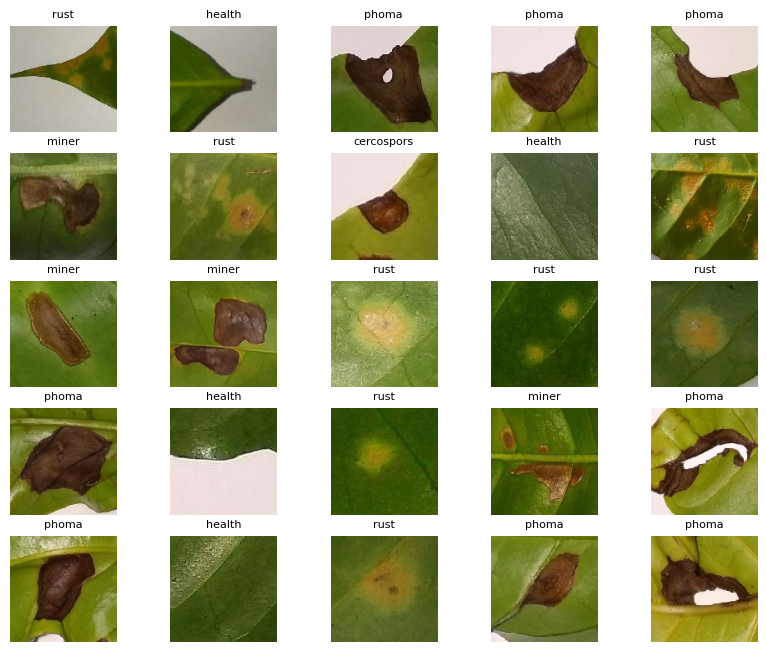

In [ ]:
#   show some samples from the dataset randomly
import random
fig = plt.figure(figsize=(10,8))

CLASSES=['cercospors', 'health', 'miner', 'phoma', 'rust']

rows = 5
columns = 5

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

In [ ]:
#   reshaping the images to 1D
X = X.reshape(-1, 128 * 128 * 3)

#   Oversampling method to remove imbalance class problem
X, y = SMOTETomek().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, 128, 128, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after SMOTETomek :	 [(0, 617), (1, 618), (2, 614), (3, 616), (4, 614)]


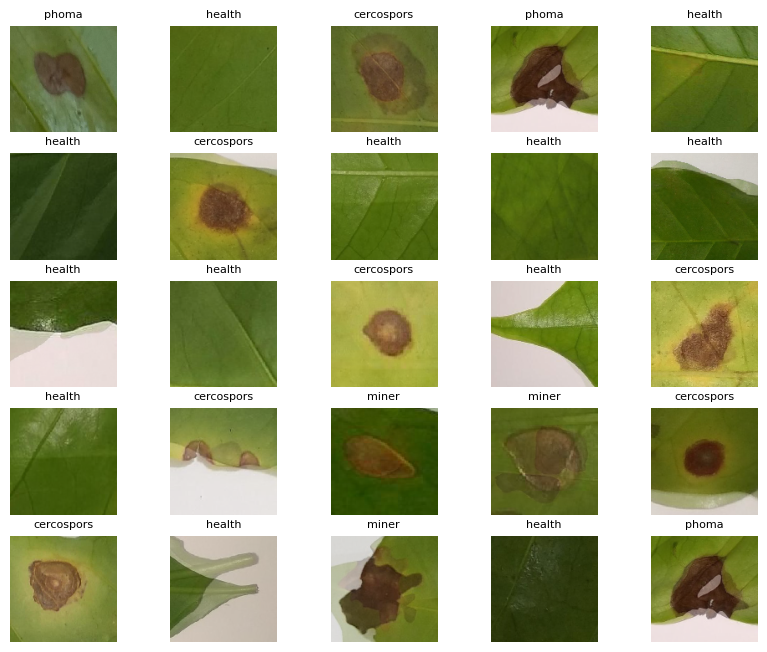

In [ ]:
fig = plt.figure(figsize=(10,8))

rows = 5
columns = 5

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(samples_before, samples_after - 1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

In [ ]:
## sliplitting

In [ ]:
#   20% split to validation and 80% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

#   20% split to test from 80% of train and 60% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 413), (1, 411), (2, 389), (3, 390), (4, 367)]
Validation	 [(0, 125), (1, 110), (2, 112), (3, 130), (4, 139)]
Test      	 [(0, 79), (1, 97), (2, 113), (3, 96), (4, 108)]


In [ ]:
#   to free memeory we don't need this one as we split our data
del X, y

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(128,128,3),classes=5)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
#Model building
base_model_tf.trainable=False

pt=Input(shape=(128,128,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(5,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()


### Model Compilation

# from tensorflow.keras.optimizers import SGD

model_main.compile(
    optimizer="Adam",
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
    # loss = "sparse_categorical_crossentropy",
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'),
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=5),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 128, 128, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 128, 128, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [ ]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training
model_main.fit(train,validation_data=valid,epochs=20,steps_per_epoch=40,verbose=1,callbacks=[mc,es,lr])

In [ ]:
#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
# batch_size = 8

hist = model_main.fit(valAug.flow(X_train, y_train, batch_size=64, shuffle = True),
steps_per_epoch=len(X_train)  // 80,
validation_data=valAug.flow(x_val, y_val, batch_size=64, shuffle = True),
validation_steps=len(x_test) //80,
epochs= 25,
batch_size=64,
# callbacks = CALLBACKS
)

Epoch 1/25
20/24 [========================>.....] - ETA: 17s - loss: 1.6216 - acc: 0.2204 - auc: 0.5223 - f1_score: 0.2132 - precision: 0.0000e+00 - recall: 0.0000e+00

In [ ]:
model.save(".\\model_f.h5")

In [ ]:
### Evaluate Model
test_scores = model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

65/65 [==============================] - 25s 390ms/step - loss: 0.0221 - acc: 0.9937 - auc: 0.9994 - f1_score: 0.9934 - precision: 0.9937 - recall: 0.9922


Testing Loss : 		 0.022055
Testing Accuracy : 	 99.368012 %
Testing AC : 		 99.941486 %
Testing F1-Score : 	 99.344635 %
Testing Precision : 	 99.367088 %
Testing Recall : 	 99.222165 %


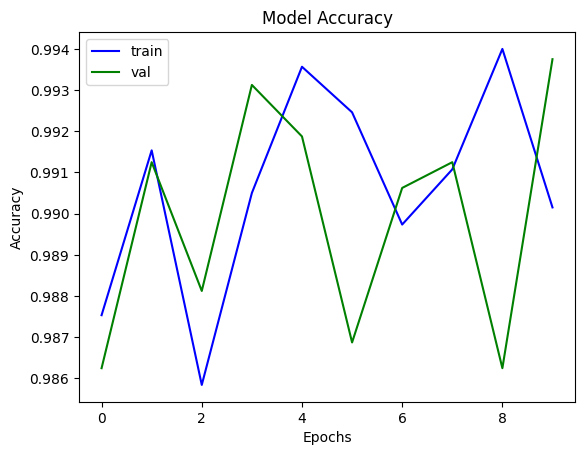

In [ ]:
plt.plot(hist.history['acc'], 'b')
plt.plot(hist.history['val_acc'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

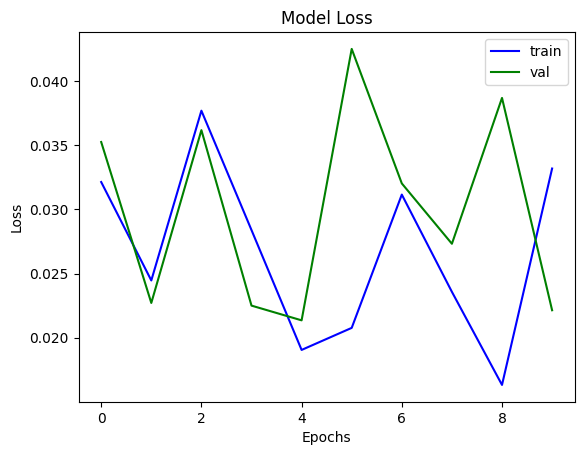

In [ ]:
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

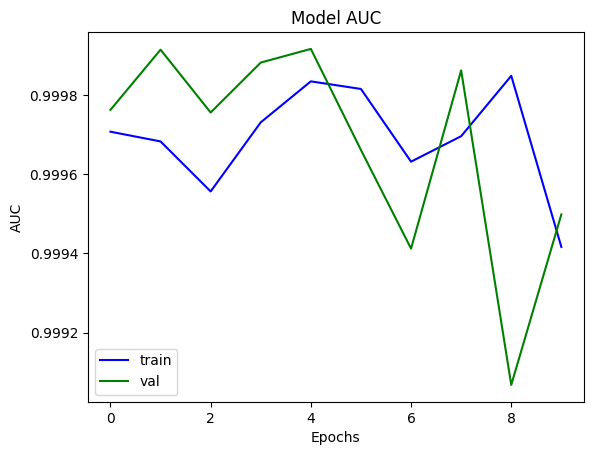

In [ ]:
plt.plot(hist.history['auc'], 'b')
plt.plot(hist.history['val_auc'], 'g')
plt.title("Model AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(["train", "val"])
plt.show()

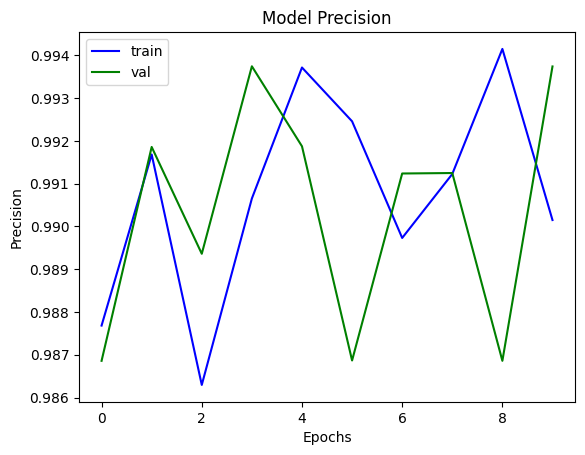

In [ ]:
plt.plot(hist.history['precision'], 'b')
plt.plot(hist.history['val_precision'], 'g')
plt.title("Model Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend(["train", "val"])
plt.show()

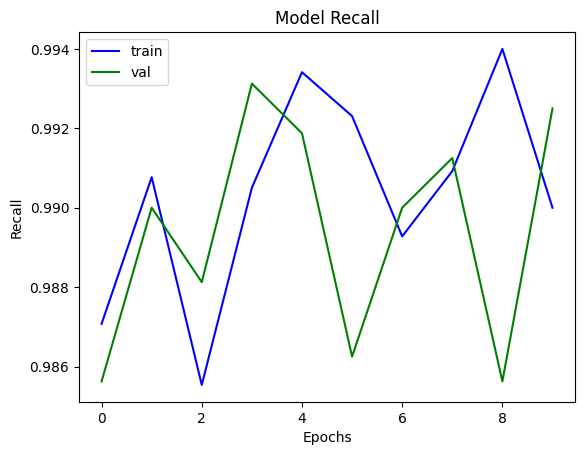

In [ ]:
plt.plot(hist.history['recall'], 'b')
plt.plot(hist.history['val_recall'], 'g')
plt.title("Model Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["train", "val"])
plt.show()

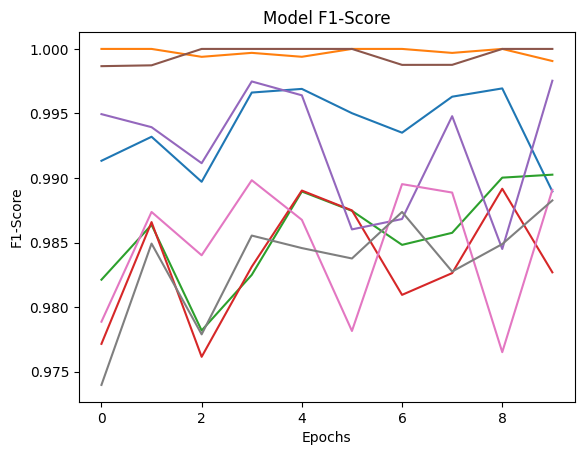

In [ ]:
plt.plot(hist.history['f1_score'])
plt.plot(hist.history['val_f1_score'])
plt.title("Model F1-Score")
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.show()

In [ ]:
pred_labels = model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(y_test, pred_labels, target_names=CLASSES))

65/65 [==============================] - 25s 391ms/step
                    precision    recall  f1-score   support

      Non_Demented       1.00      1.00      1.00       524
 Moderate_Demented       1.00      1.00      1.00       543
     Mild_Demented       0.99      0.98      0.99       516
Very_Mild_Demented       0.98      0.99      0.99       474

         micro avg       0.99      0.99      0.99      2057
         macro avg       0.99      0.99      0.99      2057
      weighted avg       0.99      0.99      0.99      2057
       samples avg       0.99      0.99      0.99      2057



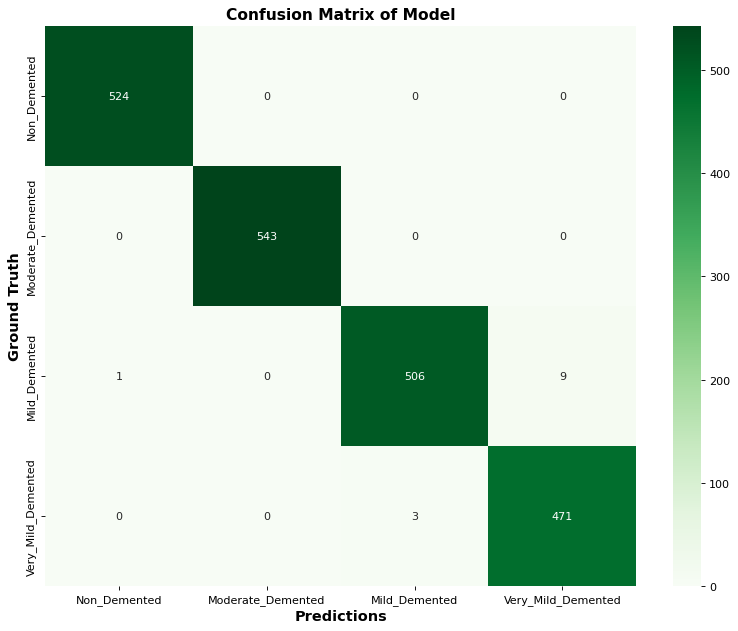

In [ ]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(y_test, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)

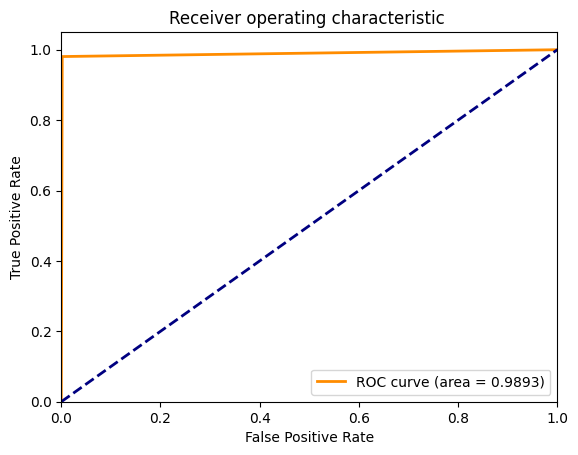

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc[2])

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

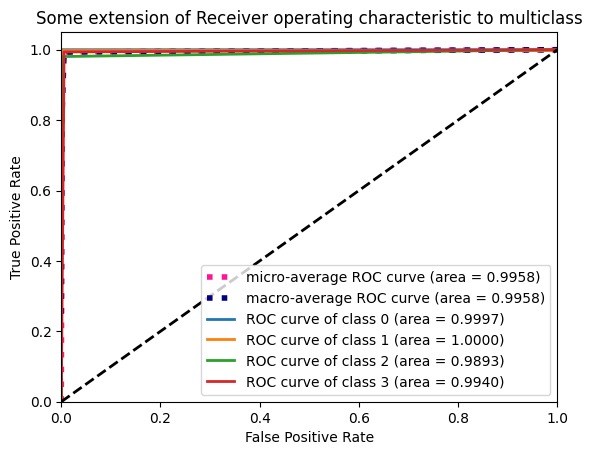

In [ ]:

n_classes = 4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

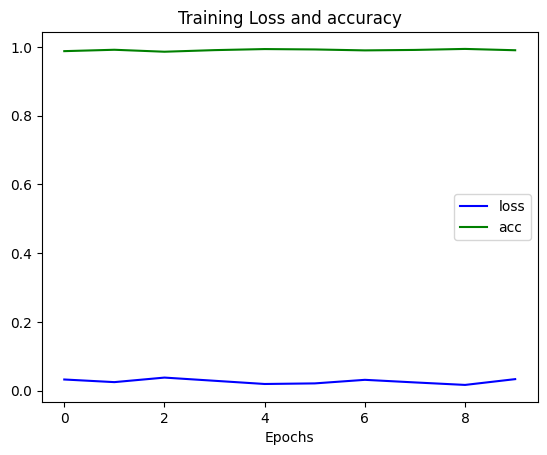

In [ ]:
plt.plot(hist.history['loss'], 'b')
plt.plot(hist.history['acc'], 'g')
plt.title("Training Loss and accuracy")
plt.xlabel("Epochs")
plt.legend(["loss", "acc"])
plt.show()

In [ ]:
model.save("f_model.h5")

In [ ]:
from sklearn.metrics import accuracy_score

pred_labels = model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

# Convert one-hot encoded predictions to integer labels
y_pred_labels = np.argmax(pred_labels, axis=1)

# Convert one-hot encoded ground truth labels to integer labels
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=CLASSES))
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy:", accuracy)


65/65 [==============================] - 25s 390ms/step
                    precision    recall  f1-score   support

      Non_Demented       1.00      1.00      1.00       524
 Moderate_Demented       1.00      1.00      1.00       543
     Mild_Demented       0.99      0.98      0.99       516
Very_Mild_Demented       0.98      0.99      0.99       474

          accuracy                           0.99      2057
         macro avg       0.99      0.99      0.99      2057
      weighted avg       0.99      0.99      0.99      2057

Accuracy: 0.9936801166747691
